In [22]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/My Drive/laboral/unipamplona/2020i/unidad1_Datos/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import pandas as pd
from numpy import array
from pylab import plot, show, grid, xticks

In [0]:
data = pd.read_csv('gdrive/My Drive/laboral/unipamplona/2020i/unidad1_Datos/data/Casos1.csv') # Leyendo datos desde el archivo Casos1.csv

In [25]:
data.head() # Muestra las primeras cinco líneas del archivo Casos1.csv

,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento,Atención**,Edad,Sexo,Tipo*,País de procedencia
0,1,06/03/2020,Bogotá,Bogotá,Recuperado,10 a 19,F,Importado,Italia
1,2,09/03/2020,Buga,Valle,Recuperado,30 a 39,M,Importado,España
2,3,09/03/2020,Medellín,Antioquia,Recuperado,50 a 59,F,Importado,España
3,4,11/03/2020,Medellín,Antioquia,En casa,50 a 59,M,Relacionado,Colombia
4,5,11/03/2020,Medellín,Antioquia,Recuperado,20 a 29,M,Relacionado,Colombia


In [0]:
dataSex = pd.DataFrame(data, columns= ['Fecha de diagnóstico','Sexo','Edad']) # Cargando en la variable dataSex los campos: Fecha diagnóstico, Sexo y Edad

In [28]:
histo = dataSex.groupby('Edad')['Sexo'].sum() # Suma el número de apariciones de M y F: Masculino, Femenino

print(histo.str.count('F'), histo.str.count('M'))

Edad
0 a 9       4
10 a 19    13
20 a 29    71
30 a 39    66
40 a 49    68
50 a 59    54
60 a 69    38
70 a 79    13
80 a 89    13
Name: Sexo, dtype: int64 Edad
0 a 9       4
10 a 19    10
20 a 29    82
30 a 39    87
40 a 49    53
50 a 59    69
60 a 69    32
70 a 79    18
80 a 89     7
Name: Sexo, dtype: int64


In [29]:
male = histo.str.count('M')
female = histo.str.count('F')
total = male.sum()+female.sum()

print("hombres:",male.sum(), round((male.sum()/total)*100,2), "%")
print("Mujeres:",female.sum(), round((female.sum()/total)*100,2), "%")
print("Total:", total)

hombres: 362 51.57 %
Mujeres: 340 48.43 %
Total: 702


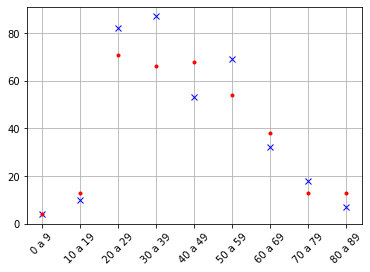

In [35]:
plot(histo.str.count('M'),'bx')
plot(histo.str.count('F'),'r.')
xticks(rotation=45)
grid()
show()